In [1]:
# load package
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator


In [2]:
import csv

In [3]:
lb_adaptive = "../april/sp_17/adaptive.csv"
lb_rand_robin = "../april/sp_17/randArobin.csv"


In [4]:
x = []
adaptive = [] 
with open(lb_adaptive, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            x.append(float(row[row_list[0]]))
            adaptive.append(float(row[row_list[1]]))
        line_count += 1    
        
maxVal = max(adaptive)
adaptive = [y/maxVal for y in adaptive]    
            

In [5]:
x = []
adaptiveRaw = [] 
with open(lb_adaptive, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            x.append(float(row[row_list[0]]))
            adaptiveRaw.append(float(row[row_list[1]]))
        line_count += 1    
        

In [6]:
print(adaptiveRaw)

[873441947.580887, 885773450.10901, 913238920.4452943, 966109165.9517254, 934468729.7678691, 949084970.2330985, 961480851.8429441, 914582540.8361717, 982388747.7410047, 931875864.8013583, 969405217.3292435, 961198974.1940266, 948822639.7761878, 989441302.8492051, 970557882.290217, 955772202.7046729, 1008712213.9727101, 956347678.5160457, 972822427.3548782, 978735055.2201715, 974331092.6117929, 966758537.6685997, 994676091.6466686, 980264110.1894739, 988699340.1761552, 975991500.2452127, 978131445.595724, 1013383250.3971565, 1025458608.437286, 1000053791.7942458, 989331897.5990037, 983171035.6533431, 1015805068.2999372, 1043138264.7887759, 1016190143.4632776, 1047093534.7694677, 1000993530.4083618, 1051172497.1239178, 1017817363.3112968, 1040784079.2957836, 1033775508.7397568, 1048272930.9444568, 1028848732.6860058, 1046988431.546157, 1054245345.5392177, 1047444001.4375423, 1032236680.9026012, 1044096665.8523476, 1054063891.5827754]


In [7]:
roundRobin = []
randSel = []
with open(lb_rand_robin, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            roundRobin.append(float(row[row_list[2]]))
            randSel.append(float(row[row_list[1]]))
        line_count += 1  
        
randSel = [y/maxVal for y in randSel] 
roundRobin = [y/maxVal for y in roundRobin] 


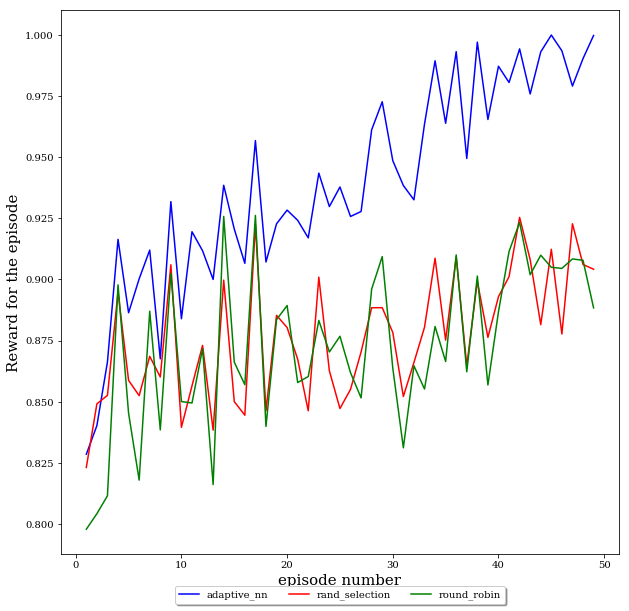

In [8]:
fig = plt.figure(figsize=(10,10))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Reward for the episode', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x, adaptive, color='b', ls='solid', label = "adaptive_nn")
ax.plot(x, randSel, color='r', ls='solid', label = "rand_selection")
ax.plot(x, roundRobin, color='g', ls='solid', label = "round_robin")


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()

In [9]:
def moving_avg(x,window_size=1):
    i = 0
    mv_x = []
    while i < len(x)-window_size+1 :
        this_window = x[i:i+window_size]
        window_avg = sum(this_window) / window_size
        mv_x.append(window_avg)
        i += 1
        
    return mv_x

In [10]:
window_size=5
mvavg_adaptive = moving_avg(adaptive,window_size)
mvavg_randSel = moving_avg(randSel,window_size)
mvavg_roundRobin = moving_avg(roundRobin,window_size)
x_mvavg = x[window_size-1:]

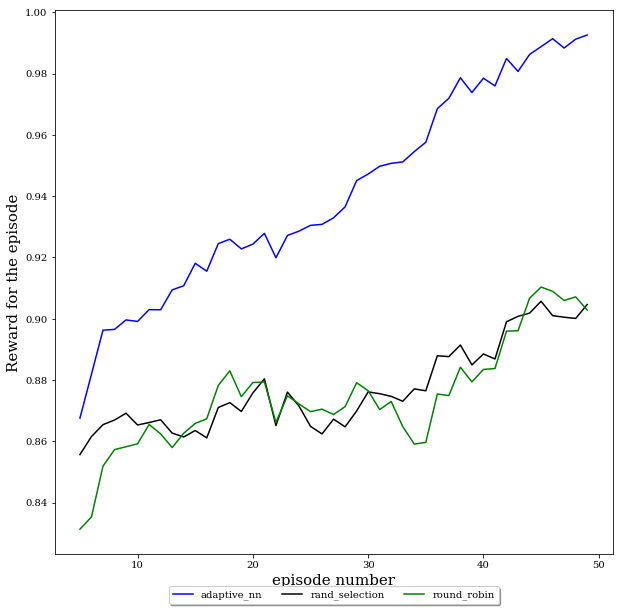

In [11]:
fig = plt.figure(figsize=(10,10))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Reward for the episode', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x_mvavg, mvavg_adaptive, color='b', ls='solid', label = "adaptive_nn")
ax.plot(x_mvavg, mvavg_randSel, color='k', ls='solid', label = "rand_selection")
ax.plot(x_mvavg, mvavg_roundRobin, color='g', ls='solid', label = "round_robin")


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()

In [12]:
ratio_adaptive = "../april/sp_17/ratio_adaptive.csv"

In [13]:
x = []
total = []
adaptive = [] 
rand = []
robin = []
retrain = []

with open(ratio_adaptive, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            x.append(float(row[row_list[0]]))
            total.append(float(row[row_list[1]]))
            adaptive.append(float(row[row_list[2]]))
            rand.append(float(row[row_list[3]]))
            robin.append(float(row[row_list[4]]))
        line_count += 1  

In [14]:
adaptiveR = []

randR = []
robinR = []

for i in range(len(x)):
    adaptiveR.append(100 * adaptive[i] / total[i])

    randR.append(100 * rand[i] / total[i])
    robinR.append(100 * robin[i] / total[i])

In [15]:
print(adaptiveR)

[85.2853653120142, 85.01332445036643, 86.86542305129913, 89.4070619586942, 88.25116588940706, 89.3826337996891, 89.4781256939818, 86.5278703086831, 89.80457472795914, 87.83255607372863, 90.30091050410837, 89.46702198534311, 88.61425716189207, 90.82389518099045, 89.45591827670442, 90.13879635798357, 91.14812347324006, 89.29158338885188, 90.32200755052187, 90.47079724628026, 89.94226071507883, 89.41705529646902, 90.67177437264046, 90.14656895403064, 90.45969353764157, 90.71063735287586, 90.11547856984232, 91.76660004441483, 91.83433266711081, 91.64556962025317, 91.41461248056851, 90.89384854541417, 92.09971130357539, 92.72707084166112, 91.61003775260937, 92.6993115700644, 91.08816344659117, 93.62202975793915, 91.97090828336664, 93.35443037974683, 92.40839440373085, 92.73040195425273, 92.0886075949367, 93.00466355762825, 93.06684432600488, 92.74372640461914, 92.24294914501444, 92.82256273595381, 92.83810792804796]


In [16]:
print(randR)

[84.81234732400621, 85.30091050410837, 85.90273151232512, 87.85254274927826, 85.65844992227404, 85.64512547190762, 86.1714412613813, 85.32866977570508, 88.00466355762825, 83.83744170552964, 85.43193426604486, 86.5067732622696, 83.56429047301799, 88.50988230068843, 84.20830557406174, 85.65511880968243, 88.88629802353987, 84.59360426382412, 87.89251610037752, 87.28625360870531, 85.92827004219409, 84.47590495225406, 88.24006218076838, 85.22762602709305, 84.49033977348435, 86.01709971130357, 85.8505440817233, 87.36397956917611, 86.75771707750388, 87.2229624694648, 85.77725960470798, 86.5101043748612, 87.16855429713524, 88.0557406173662, 85.84943371085943, 87.50499666888742, 85.78614257161892, 87.70486342438375, 86.2458361092605, 87.54608039085055, 87.89251610037752, 88.8318898512103, 88.29335998223407, 86.15478569842327, 88.43770819453698, 86.56118143459915, 89.3648678658672, 88.32000888296692, 87.50721741061514]


In [17]:
print(robinR)

[81.41905396402399, 80.5929380413058, 81.93759715745058, 87.71374639129469, 83.85964912280701, 81.90983788585388, 87.15522984676882, 82.88030202087498, 87.45725072174106, 84.07506107039751, 84.2205196535643, 85.74727959138352, 81.23362202975794, 89.90339773484344, 85.37530535198756, 85.76504552520542, 88.78858538751943, 83.52653786364645, 86.98090162114146, 87.22851432378414, 84.62691538974018, 84.96002664890074, 86.18698645347546, 85.30535198756385, 85.90273151232512, 85.94270486342438, 84.21496779924495, 87.49944481456806, 88.15345325338663, 85.58960692871419, 83.29335998223407, 85.32422829224961, 84.47479458139019, 85.42638241172551, 84.61359093937375, 87.08749722407283, 84.69575838330002, 87.51499000666223, 84.34266044858983, 86.97312902509438, 88.15012214079502, 88.29891183655342, 87.6460137685987, 88.03020208749723, 87.83033533200089, 87.76260270930491, 87.69375971574506, 87.92360648456585, 85.89051743282256]


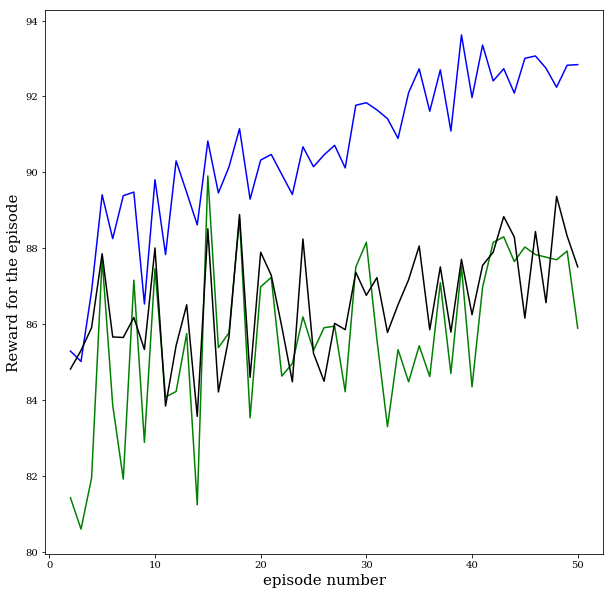

In [18]:
fig = plt.figure(figsize=(10,10))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Reward for the episode', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x, adaptiveR, color='b', ls='solid', label = "adaptive_nn")

ax.plot(x, robinR, color='g', ls='solid', label = "round_robin")
ax.plot(x, randR, color='k', ls='solid', label = "random")

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#          fancybox=True, shadow=True, ncol=5)

plt.show()

In [19]:
window_size=5
mvavg_adaptiveR = moving_avg(adaptiveR,window_size)

mvavg_robinR = moving_avg(robinR,window_size)
mvavg_randR = moving_avg(randR,window_size)
x_mvavg = x[window_size-1:]

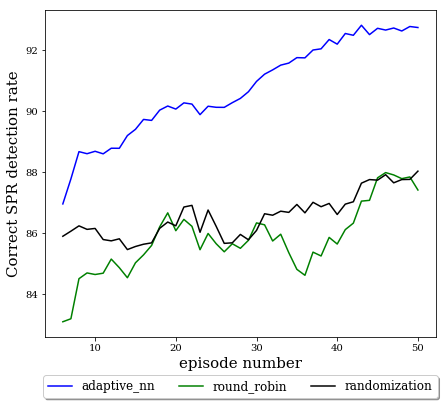

In [20]:
fig = plt.figure(figsize=(7,6))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Correct SPR detection rate', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x_mvavg, mvavg_adaptiveR, color='b', ls='solid', label = "adaptive_nn")

ax.plot(x_mvavg, mvavg_robinR, color='g', ls='solid', label = "round_robin")
ax.plot(x_mvavg, mvavg_randR, color='k', ls='solid', label = "randomization")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5, prop = dict(size=12))

plt.show()

In [21]:
avg_adapt = sum(adaptiveR[20:]) / len(adaptiveR[12:])

avg_rand = sum(randR[20:]) / len(randR[12:])
avg_robin = sum(robinR[20:]) / len(robinR[12:])

print("avg_adapt : ",avg_adapt)

print("avg_robin : ",avg_robin)
print("avg_rand : ",avg_rand)

avg_adapt :  71.94963117681304
avg_robin :  67.60417979605187
avg_rand :  68.13748792096563


In [22]:
robin_better = 100* (avg_adapt-avg_robin) / avg_robin  
rand_better = 100* (avg_adapt-avg_rand) / avg_rand

print(" better by than robin: ", robin_better)
print(" better by than random: ", rand_better)

 better by than robin:  6.4277850775950895
 better by than random:  5.594781040752804


In [23]:
place_adaptive = "../april/sp_17/placeReward_adaptive.csv"

In [24]:
x = []
adaptiveP = [] 
randP = []
robinP = []


with open(place_adaptive, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            x.append(float(row[row_list[0]]))
            adaptiveP.append(float(row[row_list[1]]))
            randP.append(float(row[row_list[2]]))
            robinP.append(float(row[row_list[3]]))
        line_count += 1  

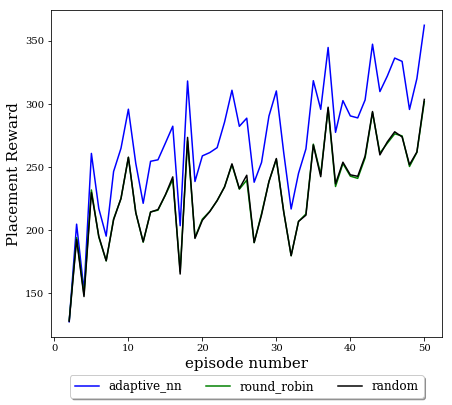

In [30]:
fig = plt.figure(figsize=(7,6))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Placement Reward', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x, adaptiveP, color='b', ls='solid', label = "adaptive_nn")

ax.plot(x, robinP, color='g', ls='solid', label = "round_robin")
ax.plot(x, randP, color='k', ls='solid', label = "random")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5, prop = dict(size=12))

plt.show()

In [26]:
window_size=5
mvavg_adaptiveP = moving_avg(adaptiveP,window_size)

mvavg_robinP = moving_avg(robinP,window_size)
mvavg_randP = moving_avg(randP,window_size)
x_mvavg = x[window_size-1:]

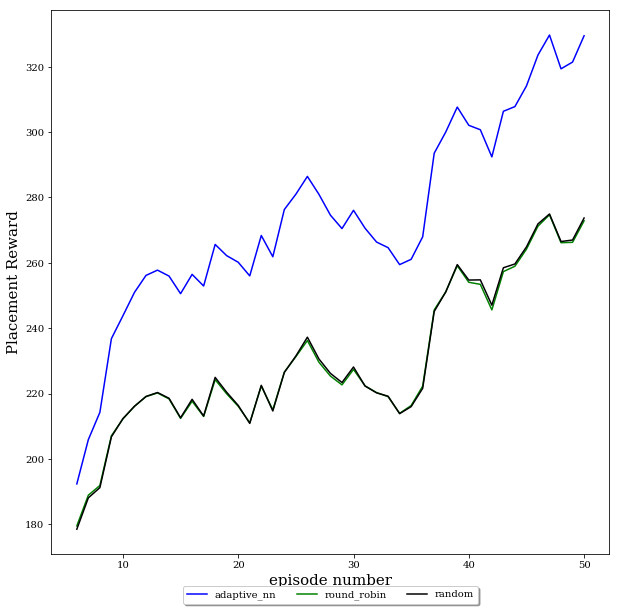

In [27]:
fig = plt.figure(figsize=(10,10))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Placement Reward', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        
ax.plot(x_mvavg, mvavg_adaptiveP, color='b', ls='solid', label = "adaptive_nn")

ax.plot(x_mvavg, mvavg_robinP, color='g', ls='solid', label = "round_robin")
ax.plot(x_mvavg, mvavg_randP, color='k', ls='solid', label = "random")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()

In [28]:
avg_adapt_place = sum(adaptiveP[20:]) / len(adaptiveP[12:])

avg_rand_place = sum(randP[20:]) / len(randP[12:])
avg_robin_place = sum(robinP[20:]) / len(robinP[12:])

print("avg_adapt : ",avg_adapt_place)

print("avg_robin : ",avg_robin_place)
print("avg_rand : ",avg_rand_place)

avg_adapt :  231.29780301470956
avg_robin :  192.31866268851945
avg_rand :  192.708135802329


In [29]:
robin_better_place = 100* (avg_adapt_place-avg_robin_place) / avg_robin_place  
rand_better_place = 100* (avg_adapt_place-avg_rand_place) / avg_rand_place 

print(" better by than robin: ", robin_better_place)
print(" better by than rand: ", rand_better_place)

 better by than robin:  20.267996761874834
 better by than rand:  20.0249289173572
